
# Open3D Visualize in Google Colab
This notebook will think about how to visualize Open3D in Google Colab.

## Install Open3D

In [2]:
!pip install open3d

     |████████████████████████████████| 188.4MB 87kB/s 


In [3]:
import numpy as np
import open3d as o3d

In [4]:
!wget https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd

--2021-03-09 13:22:22--  https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [text/plain]
Saving to: ‘bunny.pcd’

bunny.pcd           100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-03-09 13:22:22 (100 MB/s) - ‘bunny.pcd’ saved [10878/10878]



In [5]:
cloud = o3d.io.read_point_cloud("bunny.pcd")
if cloud.is_empty(): exit()

In [6]:
cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
points = np.asarray(cloud.points)

In [11]:
colors = None
if cloud.has_colors():
    colors = np.asarray(cloud.colors)
elif cloud.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
else:
    geometry.paint_uniform_color((1.0, 0.0, 0.0))
    colors = np.asarray(geometry.colors)

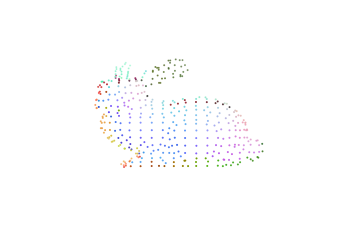

In [12]:
# Single View
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

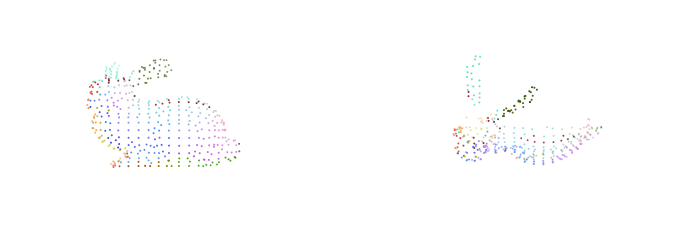

In [13]:
# Multi View
figsize = plt.rcParams.get('figure.figsize')
fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax1.axis("off")
ax1.view_init(90, -90) # front view
ax1.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
ax2.axis("off")
ax2.view_init(90 + 90, -90) # top view
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

In [14]:
import plotly.graph_objects as go

In [17]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], 
            mode='markers',
            marker=dict(size=3, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()